In [24]:
import sys
import pandas as pd
import numpy as np
import collections

import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt

from matplotlib import font_manager as fm
from  matplotlib import cm

In [105]:
sh1 = pd.read_json('data/SH_ty1.json')
sh1_t = sh1.T
w = pd.read_json('data/WX_yao.json')

In [106]:
class Shanghan():
    def __init__(self):
        self.sh1 = pd.read_json('data/SH_ty1.json')
        self.wx = {y: sx for sx, yao in w.loc["药物"].iteritems() for y in yao}
        pass
        
        
    def bianzheng(self,zheng):#根据证输出对应方剂(简单根据伤寒的对应,而非根据心法)
        a = self.sh1.loc['证'].apply(lambda x: set(x['体证']))
        print(a[a.apply(lambda x: zheng <= x)].index[0])
        
                
    def find(self,find):#简单查询某一个方剂的信息
        self.find = find
        print(sh1[self.find])
        
    def count_all(self,yao):#可以查询每个方剂或药物在整个伤寒里的统计
        a = self.sh1.loc['方']
        s = a[a.apply(lambda x: yao in x)].count()
        print(s)
        
        pass
    
    def draw_dir_all(self):#画每一个方剂的方向图
        fang = self.sh1.loc['方']
        sx = [self.wx.get(y,"暂不明") for f in fang for y in f]
        sx_len = len(sx)
        qq = {y: cnt / sx_len for y, cnt in collections.Counter(sx).items()}
        
        #----------------下面是画饼图-----------------------------------
        
        labels = list(qq.keys())
        X = list(qq.values())
        fig, ax = plt.subplots(figsize=(11,11))
        
        #fig = plt.figure(1, figsize=(11,11))
        
        colors = cm.rainbow(np.arange(len(X))/len(X))
        patches, texts, autotexts = ax.pie(X, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=170, colors=colors)
        
        proptease = fm.FontProperties()
        proptease.set_size('x-large')
        
        plt.setp(autotexts, fontproperties=proptease)
        plt.setp(texts, fontproperties=proptease)

        plt.title("伤寒全部方剂五行方向图", pad = 30)
        plt.axis('equal')
        plt.show()  
        
        
        
    def draw_dir(self,f):
        fang = self.sh1.loc['方'][f]
        sx = [self.wx.get(y, "暂不明") for y in fang]
        fang_len = len(fang)
        qq = {s: cnt / fang_len for s, cnt in collections.Counter(sx).items()}  #字典解析
        
        #----------------下面是画饼图-----------------------------------
         
        labels = list(qq.keys())
        X = list(qq.values())
        fig, ax = plt.subplots(figsize=(11,11))
        
        colors = cm.rainbow(np.arange(len(X))/len(X))
        patches, texts, autotexts = ax.pie(X, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=170, colors=colors)
        
        proptease = fm.FontProperties()
        proptease.set_size('x-large')
        
        title = str(f)+'的五行方向图'
        
        plt.setp(autotexts, fontproperties=proptease)
        plt.setp(texts, fontproperties=proptease)
        
        
        plt.title(title, pad = 30)
        plt.axis('equal')
        plt.show()  
        
        
        
        


In [107]:
br1 = Shanghan()

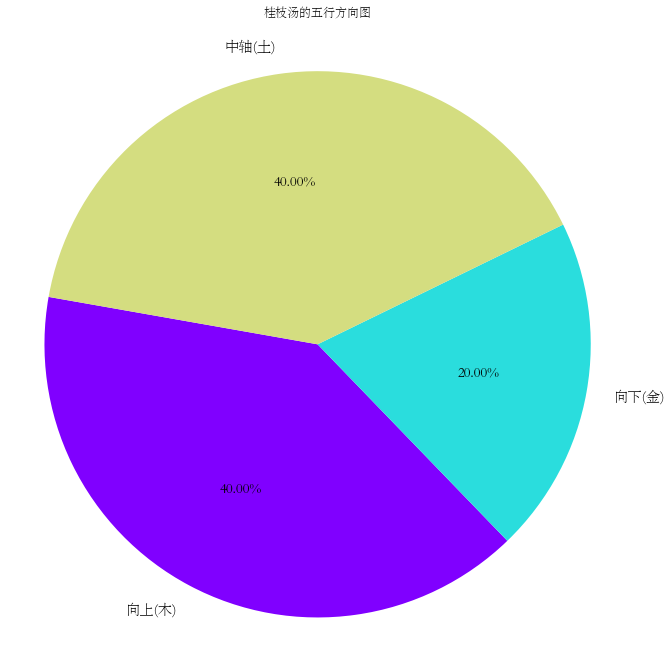

In [108]:
Shanghan().draw_dir('桂枝汤')

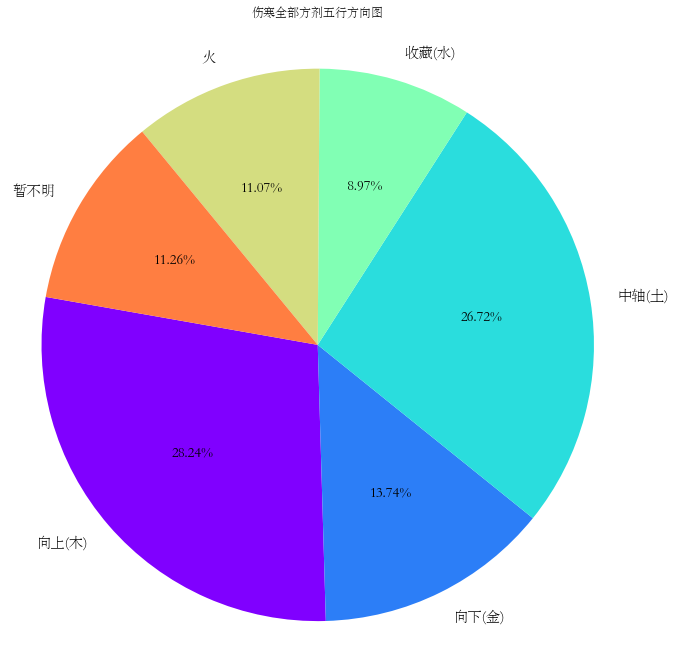

In [109]:
br1.draw_dir_all()

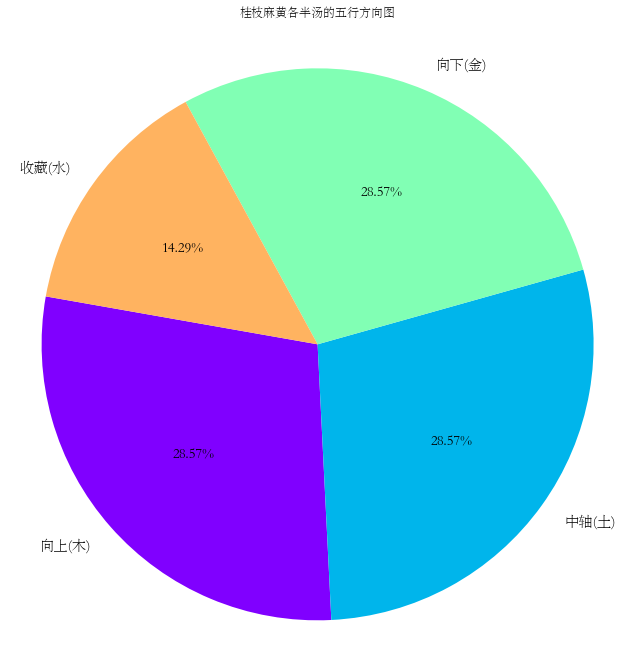

In [83]:
br1.draw_dir('桂枝麻黄各半汤')

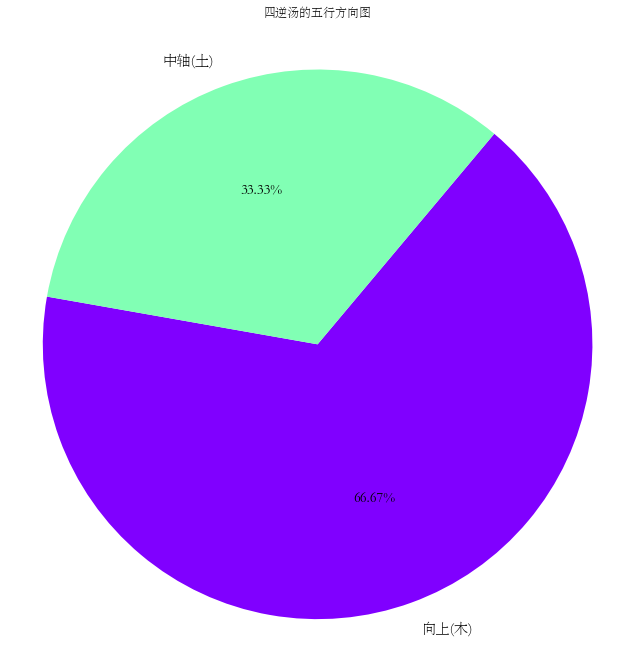

In [55]:
br1.draw_dir('四逆汤')

In [389]:
br1.bianzheng({'口苦'})

桂枝去芍药加附子汤


In [266]:
br1.bianzheng({'肌肉酸痛','怕风'})

桂枝加葛根汤


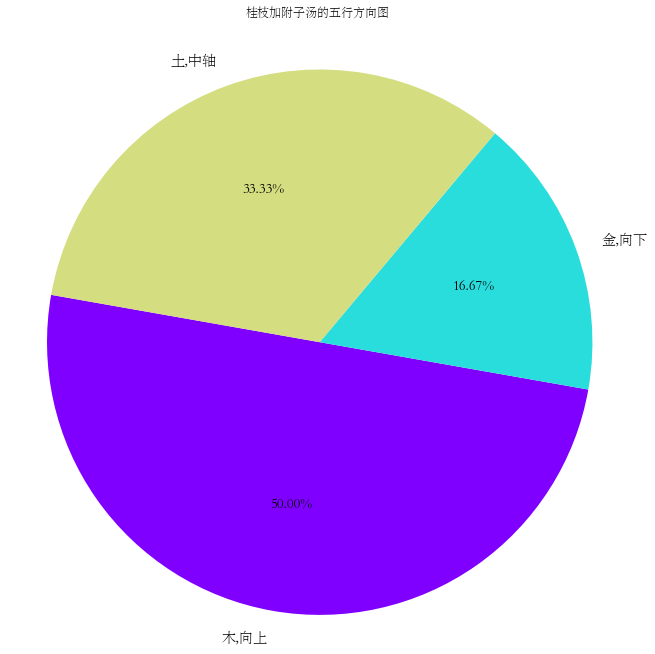

In [369]:
br1.draw_dir('桂枝加附子汤')

In [104]:
br1.count_all('柴胡')

7


In [7]:
sh1

,桂枝汤,桂枝加葛根汤,桂枝加附子汤
六经,"{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}"
原文,{'对应证原文': ['太阳中风，阳浮而阴弱，阳浮者热自发，阴弱者汗自出，啬啬恶寒，淅淅恶风...,"{'对应证原文': ['太阳病，项背强几几，反汗出恶风者，桂枝加葛根汤主之。', '太阳与阳...",{'对应证原文': ['太阳病，发汗，遂漏不止，其人恶风，小便难，四支微急，难以屈伸者，桂枝...
方,"{'桂枝': 3, '芍药': 3, '炙甘草': 2, '生姜': 3, '大枣': 12}","{'葛根': 4, '桂枝': 3, '芍药': 2, '炙甘草': 2, '生姜': 3,...","{'附子': 1, '桂枝': 3, '芍药': 3, '炙甘草': 3, '生姜': 3,..."
证,"{'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出...","{'体证': ['肌肉酸痛', '怕风'], '脉证': ['无']}","{'体证': ['大量出汗不止', '怕风', '小便难', '四肢难以屈伸'], '脉证'..."


In [14]:
sh1.loc['证'].apply(lambda x: set(x['体证']))

桂枝汤       {发热, 出汗, 干呕, 怕冷, 头痛, 怕风, 鼻涕}
桂枝加葛根汤                      {肌肉酸痛, 怕风}
桂枝加附子汤       {小便难, 怕风, 四肢难以屈伸, 大量出汗不止}
Name: 证, dtype: object

In [13]:
sh1.loc['证']

桂枝汤       {'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出...
桂枝加葛根汤                  {'体证': ['肌肉酸痛', '怕风'], '脉证': ['无']}
桂枝加附子汤    {'体证': ['大量出汗不止', '怕风', '小便难', '四肢难以屈伸'], '脉证'...
Name: 证, dtype: object

In [15]:
zz = {'鼻涕','怕风'}

In [ ]:
loc iloc at iat

In [16]:
a = sh1.loc['证'].apply(lambda x: set(x['体证']))

In [32]:
print(a[a.apply(lambda x: zz < x)].index[0])

桂枝汤


In [29]:
s = '怕风'

In [30]:
repr(s)

"'怕风'"

In [33]:
print(str(s))

怕风


In [67]:
len(sh1.loc['方'].apply(lambda x: x['桂枝']))

3

In [93]:
br1.find('四逆汤')

TypeError: 'str' object is not callable

In [96]:
w

,土,金,火,水,木
味,甘甜,酸,咸,苦,辛辣
药物,"[炙甘草, 人参, 大枣]","[芍药, 柴胡]",[大黄],"[地黄, 麻黄]","[干姜, 附子, 桂枝, 半夏]"


In [104]:
{i: i for i in range(10)}

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

In [110]:
{y: sx for sx, yao in w.loc["药物"].iteritems() for y in yao}  # 字典生成shi

{'炙甘草': '土',
 '人参': '土',
 '大枣': '土',
 '芍药': '金',
 '柴胡': '金',
 '大黄': '火',
 '地黄': '水',
 '麻黄': '水',
 '干姜': '木',
 '附子': '木',
 '桂枝': '木',
 '半夏': '木'}

In [224]:
y_x = {}
for sx, yao in w.loc["药物"].iteritems():
    for y in yao:
        y_x[y] = sx
y_x

{'炙甘草': '土',
 '人参': '土',
 '大枣': '土',
 '芍药': '金',
 '柴胡': '金',
 '大黄': '火',
 '地黄': '水',
 '麻黄': '水',
 '干姜': '木',
 '附子': '木',
 '桂枝': '木',
 '半夏': '木'}

In [225]:
sh1

,桂枝汤,桂枝加葛根汤,桂枝加附子汤
六经,"{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}"
原文,{'对应证原文': ['太阳中风，阳浮而阴弱，阳浮者热自发，阴弱者汗自出，啬啬恶寒，淅淅恶风...,"{'对应证原文': ['太阳病，项背强几几，反汗出恶风者，桂枝加葛根汤主之。', '太阳与阳...",{'对应证原文': ['太阳病，发汗，遂漏不止，其人恶风，小便难，四支微急，难以屈伸者，桂枝...
方,"{'桂枝': 3, '芍药': 3, '炙甘草': 2, '生姜': 3, '大枣': 12}","{'葛根': 4, '桂枝': 3, '芍药': 2, '炙甘草': 2, '生姜': 3,...","{'附子': 1, '桂枝': 3, '芍药': 3, '炙甘草': 3, '生姜': 3,..."
证,"{'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出...","{'体证': ['肌肉酸痛', '怕风'], '脉证': ['无']}","{'体证': ['大量出汗不止', '怕风', '小便难', '四肢难以屈伸'], '脉证'..."


In [226]:
fang = sh1.loc["方"]
fang

桂枝汤         {'桂枝': 3, '芍药': 3, '炙甘草': 2, '生姜': 3, '大枣': 12}
桂枝加葛根汤    {'葛根': 4, '桂枝': 3, '芍药': 2, '炙甘草': 2, '生姜': 3,...
桂枝加附子汤    {'附子': 1, '桂枝': 3, '芍药': 3, '炙甘草': 3, '生姜': 3,...
Name: 方, dtype: object

In [234]:
sx = [y_x.get(y, "土") for f in fang for y in f]
sx_len = len(sx)
{y: cnt / sx_len for y, cnt in collections.Counter(sx).items()}

{'木': 0.2222222222222222,
 '金': 0.16666666666666666,
 '土': 0.5555555555555556,
 '水': 0.05555555555555555}

In [136]:
import collections

def count(x):
    sx = [y_x.get(y, "土") for y in x]
    x_len = len(x)
#     d = {}
#     print(sx)
#     for s, cnt in collections.Counter(sx).items():
#         d[s] = cnt / x_len
#     return d
    return {s: cnt / x_len for s, cnt in collections.Counter(sx).items()}#字典解析

q1 = fang.apply(count)

fig = plt.figure()
plt.pie(x,labels=labels,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Pie chart")
  
 
plt.show()

桂枝汤                          {'木': 0.2, '金': 0.2, '土': 0.6}
桂枝加葛根汤    {'土': 0.5714285714285714, '木': 0.1428571428571...
桂枝加附子汤    {'木': 0.3333333333333333, '金': 0.1666666666666...
Name: 方, dtype: object

In [134]:
import collections

In [135]:
collections.Counter([1, 1, 3]).items()

dict_items([(1, 2), (3, 1)])

In [41]:
sh1.head()

,桂枝汤,桂枝加葛根汤,桂枝加附子汤,桂枝去芍药汤,桂枝去芍药加附子汤,桂枝麻黄各半汤,桂枝二麻黄一汤,白虎加人参汤,桂枝二越婢一汤,桂枝去桂加茯苓白术汤,...,桂枝人参汤,瓜蒂散,黄芩汤,黄芩加半夏生姜汤,黄连汤,桂枝附子汤,去桂加白术汤,甘草附子汤,白虎汤,炙甘草汤
六经,"{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}",...,"{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}"
原文,{'对应证原文': ['太阳中风，阳浮而阴弱，阳浮者热自发，阴弱者汗自出，啬啬恶寒，淅淅恶风...,"{'对应证原文': ['太阳病，项背强几几，反汗出恶风者，桂枝加葛根汤主之。', '太阳与阳...",{'对应证原文': ['太阳病，发汗，遂漏不止，其人恶风，小便难，四支微急，难以屈伸者，桂枝...,"{'对应证原文': ['太阳病。下之后。脉促。胸满者。桂枝去芍药汤主之。'], '方剂原文'...","{'对应证原文': ['若微寒者。桂枝去芍药加附子汤主之。'], '方剂原文': '桂枝三两...",{'对应证原文': ['面色反有热色者。未欲解也。以其不能得小汗出 。 身必痒。宜桂枝麻黄各...,{'对应证原文': ['服桂枝汤。大汗出。脉洪大者。与桂枝汤如前法。若形似疟。一日再发者。汗...,{'对应证原文': ['伤寒。若吐若下后。七八日不解。热结在里。表里俱热。时时恶风。大渴。舌...,{'对应证原文': ['太阳病。发热恶寒。热多寒少。脉微弱者。此无阳也。不可发汗。宜桂枝二越...,{'对应证原文': ['服桂枝汤。或下之。仍头项强痛。翕翕发热。无汗。心下满微痛。小便不利者...,...,{'对应证原文': ['太阳病。外证未除。而数下之。遂协热而利。利下不止。心下痞鞕。表里不解...,{'对应证原文': ['病如桂枝证。头不痛。项不强。寸脉微浮。胸中痞鞕。气上冲喉咽。不得息者...,"{'对应证原文': ['太阳与少阳合病。自下利者。与黄芩汤。'], '方剂原文': '黄芩三...",{'对应证原文': ['太阳与少阳合病。自下利者。与黄芩汤。若呕者。黄芩加半夏生姜汤主之.'...,"{'对应证原文': ['伤寒。胸中有热。胃中有邪气。腹中痛。欲呕吐者。黄连汤主之'], '方...",{'对应证原文': ['伤寒八九日。风湿相搏。身体疼烦。不能自转侧。不呕。不渴。脉浮虚而涩者...,{'对应证原文': ['伤寒八九日。风湿相搏。身体疼烦。不能自转侧。不呕。不渴。脉浮虚而涩者...,{'对应证原文': ['风湿相搏。骨节疼烦。掣痛不得屈伸。近之则痛剧。汗出。短气。小便不利。...,"{'对应证原文': ['伤寒。脉浮滑。此以表有热。里有寒。白虎汤主之'], '方剂原文': ...","{'对应证原文': ['伤寒。脉结代。心动悸。炙甘草汤主之。'], '方剂原文': '甘草四..."
方,"{'桂枝': 3, '芍药': 3, '炙甘草': 2, '生姜': 3, '大枣': 12}","{'葛根': 4, '桂枝': 3, '芍药': 2, '炙甘草': 2, '生姜': 3,...","{'附子': 1, '桂枝': 3, '芍药': 3, '炙甘草': 3, '生姜': 3,...","{'桂枝': 3, '炙甘草': 2, '生姜': 3, '大枣': 12}","{'桂枝': 3, '炙甘草': 2, '生姜': 3, '大枣': 12, '附子': 1}","{'桂枝': 1.6600000000000001, '炙甘草': 1, '生姜': 1, ...","{'桂枝': 1.6600000000000001, '炙甘草': 1, '生姜': 1, ...","{'知母': '6两', '石膏': '1斤', '炙甘草': '2两', '人参': '2...","{'桂枝': 1, '芍药': 1, '炙甘草': 1, '麻黄': 1, '生姜': 1,...","{'白术': 3, '芍药': 3, '炙甘草': 2, '茯苓': 3, '生姜': 3,...",...,"{'桂枝': '4两', '炙甘草': '4两', '白术': '3两', '人参': '3...","{'瓜蒂': '1分', '赤小豆': '1分'}","{'黄芩': '3两', '芍药': '2两', '炙甘草': '2两', '大枣': '1...","{'黄芩': '3两', '芍药': '2两', '炙甘草': '2两', '大枣': '1...","{'黄连': '3两', '炙甘草': '3两', '干姜': '3两', '桂枝': '3...","{'桂枝': '4两', '附子': '3枚', '生姜': '3两', '大枣': '12...","{'白术': '4两', '附子': '3枚', '生姜': '3两', '大枣': '12...","{'白术': '2两', '附子': '2枚', '桂枝': '4两', '炙甘草': '2两'}","{'知母': '6两', '石膏': '1斤', '粳米': '6合', '炙甘草': '2两'}","{'生地黄': '1斤', '人参': '2两', '生姜': '3两', '大枣': '3..."
证,"{'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出...","{'体证': ['肌肉酸痛', '怕风'], '脉证': ['无']}","{'体证': ['大量出汗不止', '怕风', '小便难', '四肢难以屈伸'], '脉证'...","{'体证': ['大便后胸胀'], '脉证': ['急促']}","{'体证': ['口苦', '轻微寒冷'], '脉证': ['暂无']}","{'体证': ['身痒'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['发热怕冷', '热多寒少'], '脉证': ['微弱']}","{'体证': ['严重头痛', '发热无汗', '心下满', '小便不多', '身体微痛']...",...,"{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}"


In [91]:
sh1.shape

(4, 111)